
# **Description:** A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them which customer is gonna churn so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.




In [584]:
# Importing modules

import warnings

# data reading and manupilartion
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical test
from scipy.stats import chi2_contingency

# import the splitter
from sklearn.model_selection import train_test_split

## data manupilation 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## modelling algorithims

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
## modelling with coss-val

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

## importing model performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [585]:
## supressing pandas warning messages.
warnings.simplefilter(action='ignore')

In [586]:
df = pd.read_csv("BankChurners.csv") # DATA SOURCE "KAGGLE": [Data link](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?datasetId=982921&searchQuery=decision+trees)

In [587]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [588]:
df.drop(columns = list(df.columns[-2:]), inplace = True) ## droping some columns about bayes classifier: not required for our analysis.

In [589]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [590]:
df.shape

(10127, 21)

In [591]:
(df.isna()).sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## NO NAN VALUES?

In [592]:
# sum statistics for numerical columns
df.loc[:,(df.dtypes != object)].describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [593]:
## what do we see?

## clientnum is just a client id, doesn't really have any predictive relevance: set it as index.
## different scale of different variables, we will need to standardise variables for logistic regression and perhaps nn?


In [594]:
# describing non-numerical columns
df.loc[:,(df.dtypes == object)].describe()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


Attrition_Flag


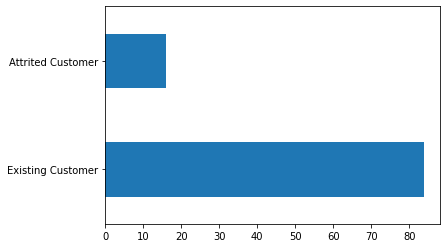

Gender


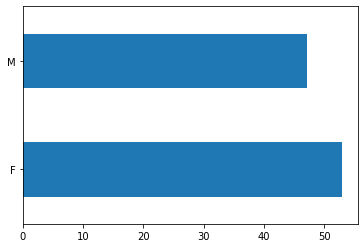

Education_Level


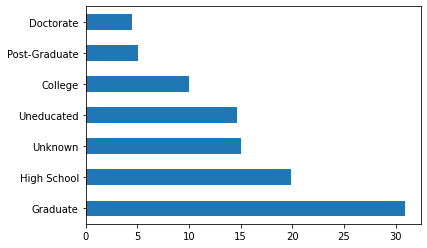

Marital_Status


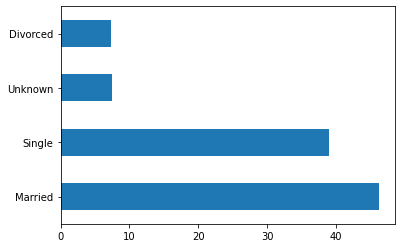

Income_Category


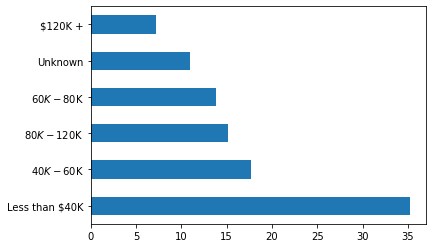

Card_Category


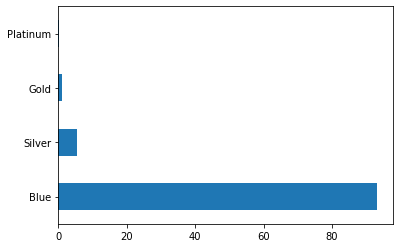

In [595]:
catagorical_df = df.loc[:,(df.dtypes == object)]
for column in catagorical_df:
    print(column)
    (df.loc[:,column].value_counts(normalize=True)*100).plot(kind = 'barh')
    sns
    plt.show()

In [596]:
## what do we see?


## 'Unknown' value set in Income_category, Education_Level, Marital_Status: drop these rows? 
## The distributin of the predicting variable looks concentrated we might have to rebalence data if models perform poorly.
# income category/educatin_level/ card_category: ordinal variable where catagory has ranks?


## begining processing data

-> step 1: deal with 'Unknown' and CLIENTNUM


In [597]:
# setting CLIENTNUM as index
df.set_index('CLIENTNUM', inplace = True)
df.replace('Unknown', np.nan, inplace=True)
(df.isna()).sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [598]:
df_droped = df.dropna()
print('orignal :', df.shape)
print('after droping :', df_droped.shape)
print('observations left: ', df_droped.shape[0] * 100/ df.shape[0])

orignal : (10127, 20)
after droping : (7081, 20)
observations left:  69.92199071788289


In [599]:
## 31% of the dataset may be gone, although 7081 observations may be enough we can investigate 
## how important are the features income category, educational_level and marital_status since they contain nan values
## we perform a chi-squared test to check whether Attrition_Flag is dependant or independant of the said variables at 5% significance level

### checking if droping observations with nan is better or droping some irrelevant features. performing chi-squared tests to check relevance of features with nan valuies 

In [600]:
# H₀: Attrition_Flag and educational_level are independent, i.e. no relationship
# H₁: Attrition_Flag and educational_level are dependent, i.e. there may be a relationship
# α = 0.05

data_crosstab = pd.crosstab(df_droped['Attrition_Flag'],
                            df_droped['Education_Level'])
## calculated a cross tab with observed frequency of each 'educational_level' value against attiration flag.
stat, p, dof, expected = chi2_contingency(data_crosstab, correction=True)


## the function will claculate the expected frequency tab of how values would ideally look like 
## if infact the two are independant and then calculate chi-squared statistic and the associated p value accordingly
p


0.0448788781974001

In [601]:
## since pval < 0.05 we can reject the null and therefore **can not** say Attrition_Flag and educational_level are independant.
## furthermore, we can not drop the column from the dataset.

In [602]:
# H₀: Attrition_Flag and Marital_Status are independent, i.e. no relationship
# H₁: Attrition_Flag and Marital_Status are dependent, i.e. there may be a relationship
# α = 0.05

data_crosstab = pd.crosstab(df_droped['Attrition_Flag'],
                            df_droped['Marital_Status'])

stat, p, dof, expected = chi2_contingency(data_crosstab)
p

0.11961462178017869

In [603]:
## since pval > 0.05 we can not reject the null and therefore **can** say Attrition_Flag and Marital_Status are independant.
## furthermore, we can drop the column from the dataset.

In [604]:
# H₀: Attrition_Flag and Income_Category are independent, i.e. no relationship
# H₁: Attrition_Flag and Income_Category are dependent, i.e. there may be a relationship
# α = 0.05

data_crosstab = pd.crosstab(df_droped['Attrition_Flag'],
                            df_droped['Income_Category'])
stat, p, dof, expected = chi2_contingency(data_crosstab)
p

0.015176678481697991

In [605]:
## since pval < 0.05 we can reject the null and therefore **can not** say Attrition_Flag and educational_level are independant.
## furthermore, we can not drop the column from the dataset.

Conclusion : from chisquared tests: we can drop marital status and then drop rows with nan, leading to decreased loss of observations.  

In [606]:
df_ = df.drop(columns = ['Marital_Status'])

In [607]:
(df_.isna()).sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [608]:
df_.dropna().shape

(7641, 19)

We can save 600 observations of data by letting go of marrital status as a feature, probably worth a shot!

### data rid of unknowns/nans and 'clientid', moving ahead in pre processing

In [609]:
df = df_.dropna()

In [610]:
df.shape

(7641, 19)

In [611]:
## we'll standardise as and when required: for logistic, KNN and perhaps nn.
df_numerical_proc = df.loc[:,df.dtypes != object]
numerical_columns = list(df_numerical_proc.columns)
df_numerical_proc.shape

X_numeric = np.matrix(df_numerical_proc)

In [612]:
X_numeric.shape

(7641, 14)

In [613]:
df_catagorical_proc = df.loc[:,(df.dtypes == object)]
df_catagorical_proc.head()

,Attrition_Flag,Gender,Education_Level,Income_Category,Card_Category
CLIENTNUM,,,,,
768805383,Existing Customer,M,High School,$60K - $80K,Blue
818770008,Existing Customer,F,Graduate,Less than $40K,Blue
713982108,Existing Customer,M,Graduate,$80K - $120K,Blue
769911858,Existing Customer,F,High School,Less than $40K,Blue
709106358,Existing Customer,M,Uneducated,$60K - $80K,Blue


In [614]:
## encoding catagorical variables to numerical by ordinalencoding and onehotencoding: Attrition_Flag the predictor is left out.

## we assume that income catagory, card catagory, Education_Level are ordinal


ordinal_variable = ['Income_Category', 'Card_Category', 'Education_Level']

print("Education: ",df.Education_Level.unique())
print("Income: ",df.Income_Category.unique())
print("Education_Level: ",df.Education_Level.unique())


Education:  ['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
Income:  ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
Education_Level:  ['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']


In [615]:
# define the right order (ascending)

cate_Edu = ['Uneducated', 'High School', 'Graduate',  'College', 'Post-Graduate','Doctorate']
cate_Inc = ['Less than $40K','$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
cate_Crd = ['Blue','Silver','Gold','Platinum']

In [616]:
# ordinal encode input variables
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[cate_Inc,cate_Crd, cate_Edu])
ordinal_encoder.fit(df[ordinal_variable])
X_ordinal = ordinal_encoder.transform(df[ordinal_variable])
print(df[ordinal_variable].shape) 
print(X_ordinal.shape) ## X_ordinal = matrix!

(7641, 3)
(7641, 3)


In [617]:
ordinal_encoder.categories_

[array(['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K',
        '$120K +'], dtype=object),
 array(['Blue', 'Silver', 'Gold', 'Platinum'], dtype=object),
 array(['Uneducated', 'High School', 'Graduate', 'College',
        'Post-Graduate', 'Doctorate'], dtype=object)]

In [618]:
pd.DataFrame(X_ordinal, columns=ordinal_variable).head() 

,Income_Category,Card_Category,Education_Level
0,2.0,0.0,1.0
1,0.0,0.0,2.0
2,3.0,0.0,2.0
3,0.0,0.0,1.0
4,2.0,0.0,0.0


In [619]:
nominal_variables = ['Gender']

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit(df[nominal_variables])
X_onehot = onehot_encoder.transform(df[nominal_variables])
print(df[nominal_variables].shape)
print(X_onehot.shape) 
# X_onehot is a matrix!!

(7641, 1)
(7641, 2)


In [620]:
# flat the list to create one list with all elements
list_onehot_cate = [item for sublist in onehot_encoder.categories_ for item in sublist]
print(list_onehot_cate)

['F', 'M']


In [621]:
pd.DataFrame(X_onehot, columns = list_onehot_cate).head() ## just to see how it looks.

,F,M
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [622]:
# creating catagorical X 

X = np.concatenate([X_ordinal,X_onehot], axis = 1)
print(X.shape)

(7641, 5)


In [623]:
X_numeric.shape

(7641, 14)

In [624]:
X = np.concatenate([X, X_numeric], axis = 1)
features = ordinal_variable + list_onehot_cate + numerical_columns ## the order of conact is maintained
print(X.shape)
print('Columns = ', len(features))

## final feature matrix is X : without normalization!!

(7641, 19)
Columns =  19


## feature matrix without standardization complete, working on predictor vcariable

In [625]:
## converting Attrition_Flag to binary
y = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0).values

In [626]:
df_processed = pd.DataFrame()
df_processed['Attrition_Flag'] = y
df_processed[features] = X
df_processed.index = df.index
df_processed.head()

,Attrition_Flag,Income_Category,Card_Category,Education_Level,F,M,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,0,2.0,0.0,1.0,0.0,1.0,45.0,3.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061
818770008,0,0.0,0.0,2.0,1.0,0.0,49.0,5.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105
713982108,0,3.0,0.0,2.0,0.0,1.0,51.0,3.0,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000
769911858,0,0.0,0.0,1.0,1.0,0.0,40.0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760
709106358,0,2.0,0.0,0.0,0.0,1.0,40.0,3.0,21.0,5.0,1.0,0.0,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000


# Train-val-Test split: 60%-25%-15%

In [627]:
# saving index information for later use
client_ids = df_processed.index

In [628]:
# get full training and test sample
X_full_train, X_test, y_full_train, y_test, ID_full_train, ID_test = train_test_split(X, y, client_ids, test_size=0.15, random_state=2022)

## creating val dataset

X_train, X_val, y_train, y_val, ID_train, ID_val = train_test_split(X_full_train, y_full_train, ID_full_train, test_size=0.25, random_state=2022)


In [629]:
print("Train: ", X_train.shape,y_train.shape,ID_train.shape)
print("val: ", X_val.shape,y_val.shape,ID_val.shape)
print("Test: ", X_test.shape,y_test.shape,ID_test.shape)

Train:  (4870, 19) (4870,) (4870,)
val:  (1624, 19) (1624,) (1624,)
Test:  (1147, 19) (1147,) (1147,)


## Standardizing **continous** variables for all datasets **seperately** to avoid any leakage. 

In [630]:
# standardize the continuous-valued inputs: the last 14 cols
## (x - mean(x))/std(x)


scaler = StandardScaler().fit(X_full_train[:,-14:])

X_full_train[:,-14:] = scaler.transform(X_full_train[:,-14:])
X_train[:,-14:] = scaler.transform(X_train[:,-14:])
X_val[:,-14:] = scaler.transform(X_val[:,-14:])
X_test[:,-14:] = scaler.transform(X_test[:,-14:])

In [631]:
X_full_train[0]

matrix([[ 3.        ,  0.        ,  3.        ,  0.        ,  1.        ,
         -0.67323456,  0.50244409, -1.00253408, -1.82099134, -1.34098759,
          0.49612652,  2.85607974,  0.55955811,  2.80328203, -0.59803939,
          2.50402116,  1.19064182,  0.04954236, -0.84136793]])

In [632]:
pd.DataFrame(X_full_train[:,-14:]).describe() ## just to have a look at the standardized data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,6.494000e+03,6.494000e+03,6.494000e+03,6.494000e+03,6.494000e+03,6.494000e+03,6.494000e+03,6.494000e+03,6.494000e+03,6.494000e+03,6.494000e+03,6.494000e+03,6.494000e+03,6.494000e+03
mean,1.348543e-16,-8.972052e-17,2.699822e-16,-8.315560e-17,-1.061328e-16,1.110565e-16,5.567049e-15,1.053122e-16,3.367802e-15,-1.995269e-14,-7.221408e-17,-1.969475e-17,3.135842e-15,5.470763e-17
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.563360e+00,-1.822091e+00,-2.885185e+00,-1.820991e+00,-2.336799e+00,-2.239661e+00,-7.762671e-01,-1.433474e+00,-8.053215e-01,-3.413656e+00,-1.128286e+00,-2.299546e+00,-3.008443e+00,-1.010875e+00
25%,-6.732346e-01,-1.047246e+00,-6.260040e-01,-5.309114e-01,-3.451759e-01,-4.158026e-01,-6.589928e-01,-9.077916e-01,-6.666366e-01,-5.800194e-01,-6.676393e-01,-8.698306e-01,-5.561252e-01,-9.243181e-01
50%,-4.319288e-02,-2.724008e-01,1.546166e-03,1.141286e-01,-3.451759e-01,-4.158026e-01,-4.589418e-01,1.466542e-01,-4.461176e-01,-1.024909e-01,-1.612021e-01,9.732991e-02,-4.363727e-02,-3.436667e-01
75%,7.128571e-01,5.024441e-01,5.977188e-01,7.591685e-01,6.506358e-01,4.961265e-01,2.458901e-01,7.543009e-01,2.403409e-01,4.426125e-01,9.721666e-02,6.860363e-01,4.476735e-01,8.392753e-01
max,3.359032e+00,2.052134e+00,2.511747e+00,1.404209e+00,3.638071e+00,3.231914e+00,2.856080e+00,1.668852e+00,2.980663e+00,1.188978e+01,3.923085e+00,2.914711e+00,1.272197e+01,2.592049e+00


# Building and training models

## logistic regression 

In [633]:
logistic = LogisticRegression(penalty='none')
# fit on the entire training set since no need for validation 
logistic.fit(X_full_train, y_full_train)
# predict on test set
yhat_logistic = logistic.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_logistic)
print('Accuracy: %.2f' % (accuracy*100))
print(confusion_matrix(y_true= y_test, y_pred = yhat_logistic))

Accuracy: 91.02
[[940  32]
 [ 71 104]]


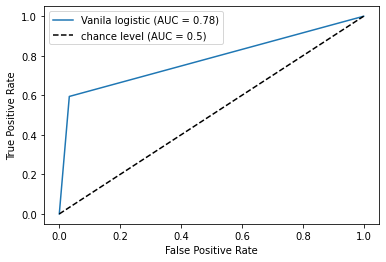

In [634]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat_logistic)

roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name ='Vanila logistic')
display.plot()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.legend()
plt.show()

### logistic regression elastic with standard validation (val set)

Note(sklearn website): The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation, or no regularization. The ‘liblinear’ solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty. The Elastic-Net regularization is only supported by the ‘saga’ solver.


In [635]:
list_l1_ratio = np.linspace(0,1,35) 
## creating a list of alpha values to try out in the val set , 35 evenly spaced numbers between 0 and 1
print(list_l1_ratio)

[0.         0.02941176 0.05882353 0.08823529 0.11764706 0.14705882
 0.17647059 0.20588235 0.23529412 0.26470588 0.29411765 0.32352941
 0.35294118 0.38235294 0.41176471 0.44117647 0.47058824 0.5
 0.52941176 0.55882353 0.58823529 0.61764706 0.64705882 0.67647059
 0.70588235 0.73529412 0.76470588 0.79411765 0.82352941 0.85294118
 0.88235294 0.91176471 0.94117647 0.97058824 1.        ]


In [636]:
## individually fitting a model and calculating 'accuracy' on the validation set
list_val_predictions = []
list_accuracy = []
list_estimated_coef = []
for alpha in list_l1_ratio:

    ## DEFINE MODEL
    logistic_elastic = LogisticRegression(penalty = 'elasticnet', l1_ratio = alpha, solver = 'saga')

    logistic_elastic.fit(X_train, y_train)
    ## not training on the full training set this time
    yhat_logistic_elastic = logistic_elastic.predict(X_val)
    ## recording predicted values, accuracy scores and calculated weights for each alpha value
    list_val_predictions.append(yhat_logistic_elastic)
    list_accuracy.append(accuracy_score(y_val, yhat_logistic_elastic))
    list_estimated_coef.append(logistic_elastic.coef_)



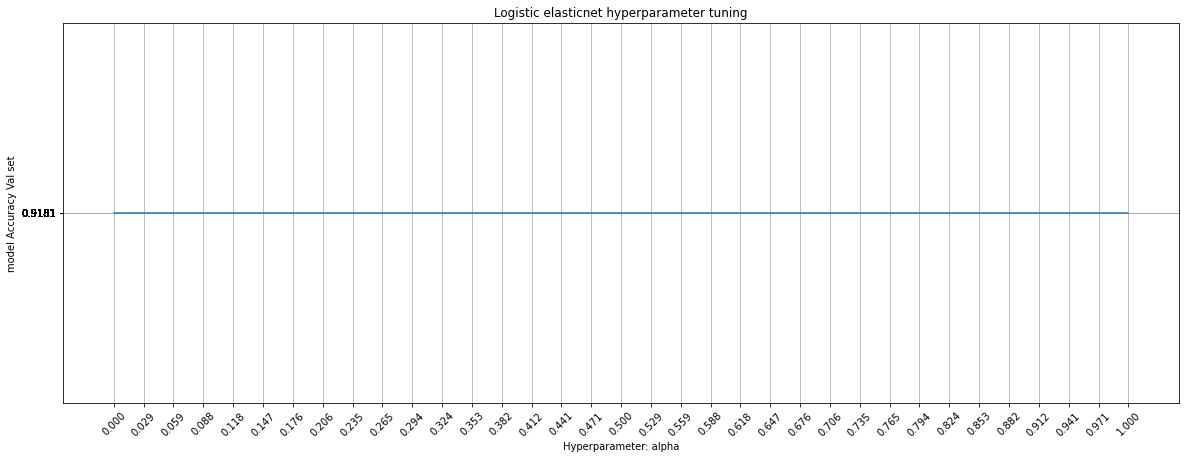

In [637]:
plt.figure(figsize = (20,7))
plt.plot(list_l1_ratio, list_accuracy)
plt.xticks(list_l1_ratio, rotation = 45)
plt.yticks(list_accuracy)
plt.xlabel('Hyperparameter: alpha')
plt.ylabel('model Accuracy Val set')
plt.grid()
plt.title("Logistic elasticnet hyperparameter tuning")
plt.show()

In [638]:
## they are the same, have we made an error somewhere?

for i in range(len(list_estimated_coef)-1):
    print(list_estimated_coef[i].sum() == list_estimated_coef[i+1].sum())

## therefore the parameters are different just that accuracy is largely unaffected by hyperparameter values.
## best l1 value looks like 0.971

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [639]:
## working with best l1_score value to predict on test set
logistic_elastic = LogisticRegression(penalty = 'elasticnet', l1_ratio = 0.971, solver = 'saga').fit(X_train, y_train)
## not training on the entire dataset again since the parameters are tuned to train set and not full train set
yhat_logistic_elastic = logistic_elastic.predict(X_test)
accuracy = accuracy_score(y_test, yhat_logistic_elastic)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 91.02


### logistic regression elastic with cross validation

tuning two hyperparameters : C and l1_ratio(alpha)

loss function = 
$$
  C\cdot l(\beta;Z) + \alpha||\beta||_1 + (1-\alpha)\frac{1}{2}||\beta||_2^2
$$

In [641]:
# define the model with elastcnet penalty

logistic_en_CV= LogisticRegressionCV(penalty='elasticnet',solver='saga',cv= 10 ,max_iter=1000,
                                     random_state=2022, l1_ratios=list_l1_ratio)  ## list of l1_ratios we generated earlier
# fit on the training set
logistic_en_CV.fit(X_full_train, y_full_train)
# predict on test set
yhat_logistic_en_CV = logistic_en_CV.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_logistic_en_CV)
print('Test Accuracy: %.2f' % (accuracy*100))

Test Accuracy: 91.02


In [ ]:
print(logistic_en_CV.C_,logistic_en_CV.l1_ratio_) ## the chosen hyperparameters.

[0.35938137] [0.58823529]


## KNearestNeigbours

In [ ]:

kNN = KNeighborsClassifier(n_neighbors = 10) ## random neigbour value
# fit on the training set
kNN.fit(X_full_train,y_full_train)
# predict on test set
yhat_kNN = kNN.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_kNN)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 91.37


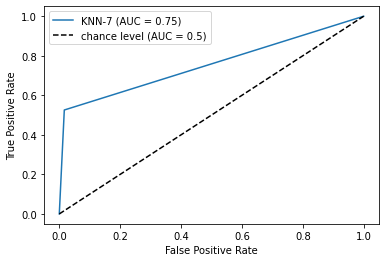

In [ ]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat_kNN)
roc_auc = metrics.auc(fpr, tpr)
display_knn = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name ='KNN-7')
display_knn.plot()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.legend()
plt.show()

### KNN with standard validation

In [ ]:
neighbours = [neighbour for neighbour in range(1,25)]
list_accuracy = []

for neighbour in neighbours:
    kNN = KNeighborsClassifier(n_neighbors = neighbour) ## random neigbour value
    # fit on the training set
    kNN.fit(X_train,y_train)
    # predict on test set
    yhat_kNN = kNN.predict(X_val)
    # evaluate predictions
    list_accuracy.append(accuracy_score(y_val, yhat_kNN))


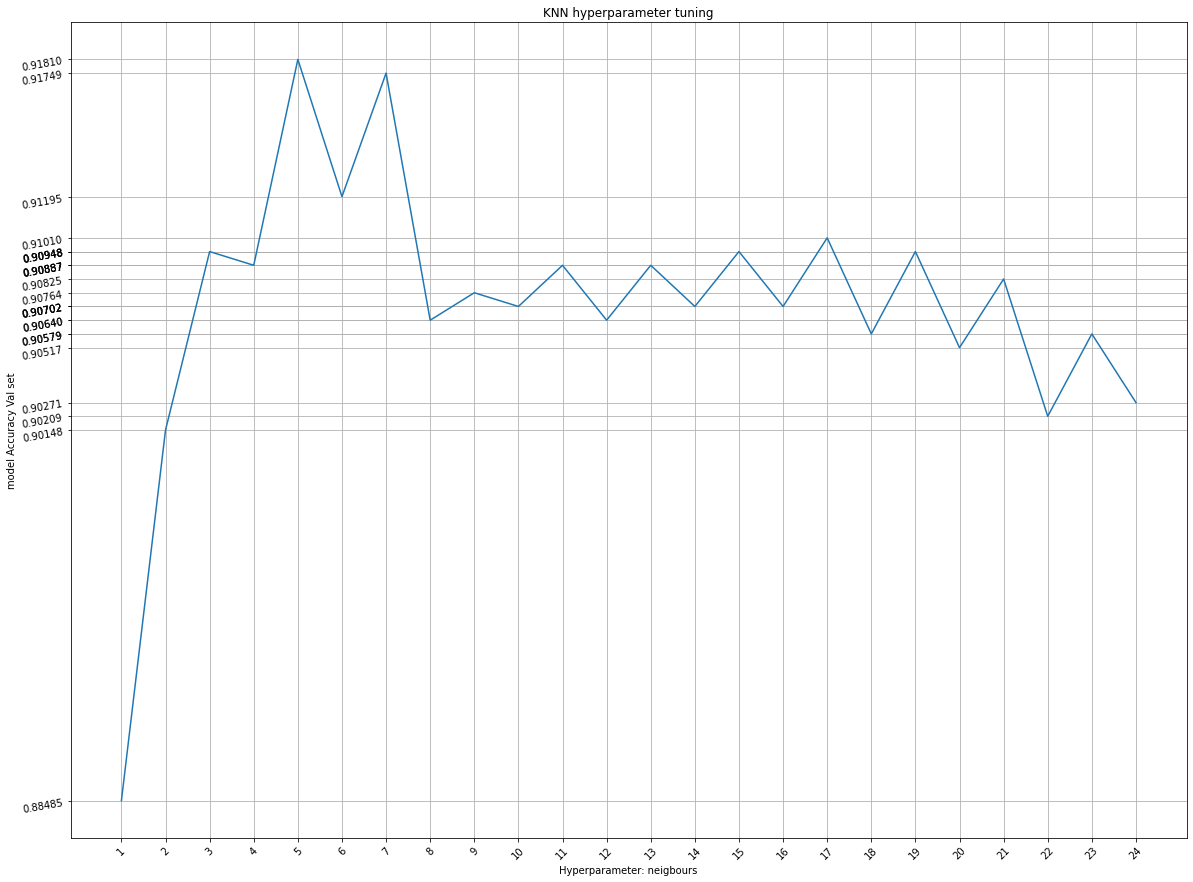

In [ ]:
plt.figure(figsize = (20,15))
plt.plot(neighbours, list_accuracy)
plt.xticks(neighbours, rotation = 45)
plt.yticks(list_accuracy, rotation = 10)
plt.xlabel('Hyperparameter: neigbours')
plt.ylabel('model Accuracy Val set')
plt.grid()
plt.title("KNN hyperparameter tuning")
plt.show()

In [ ]:
## working with the best hyperparameter: 5

kNN = KNeighborsClassifier(n_neighbors = 5) ## random neigbour value
# fit on the training set
kNN.fit(X_full_train,y_full_train)
# predict on test set
yhat_kNN = kNN.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_kNN)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 91.54


### KNN with cross validation

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys() ## sklearn list of scoring metrics

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
## no standard function for CV, we must write our own using cross_val_score
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    kNN_CV = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(kNN_CV, X_full_train, y_full_train, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())

In [ ]:
# choose the best k
idx_best_k = np.argmax(k_scores)
best_k = k_range[idx_best_k]
print('Best k = {}'.format(best_k))

Best k = 5


In [ ]:
## working with the best hyperparameter: 5

kNN = KNeighborsClassifier(n_neighbors = 5) ## random neigbour value
# fit on the training set
kNN.fit(X_full_train,y_full_train)
# predict on test set
yhat_kNN = kNN.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_kNN)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 91.54


## Decision trees

In [ ]:
# define the model: using metric entropy

DT = DecisionTreeClassifier(random_state=2023,criterion='gini')
# fit on the training set
DT.fit(X_full_train,y_full_train)
# predict on test set
yhat_DT = DT.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_DT)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 94.94


In [ ]:
## we don't need standardised data for the tree classifiers, how well does the tree do on non standardized data?

X_full_train_tree, X_test_tree, y_full_train_tree, y_test_tree, ID_full_train_tree, ID_test_tree = train_test_split(X, y, client_ids, test_size=0.15, random_state=2022)

In [ ]:
# define the model: using metric entropy
DT = DecisionTreeClassifier(random_state=2023, criterion='gini')
# fit on the training set
DT.fit(X_full_train_tree,y_full_train_tree)
# predict on test set
yhat_DT = DT.predict(X_test_tree)
# evaluate predictions
accuracy = accuracy_score(y_test_tree, yhat_DT)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 94.94


In [ ]:
print(DT.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2023, 'splitter': 'best'}


### Decision trees with Pre-pruning

In [ ]:
# import GridSearchCV: to tune multiple parameters at a time
# define hyperparameters (dictionary) and all sort of values for each hyperparameter we are tuning
dict_hyperparam = {
                  'criterion': ['gini', 'entropy'], 
                  'max_depth': range(1,10),
                  'min_samples_split': range(2,10),
                  'min_samples_leaf': range(1,5)
                  }
# define the model
DT = DecisionTreeClassifier(random_state=2023)
DT_GS = GridSearchCV(DT, param_grid=dict_hyperparam,cv=10,verbose=1,
                     n_jobs=-1) # n_jobs=-1 using all processors for parallel computation. 
DT_GS.fit(X_full_train,y_full_train)
## prinitning the best hyperparameters
print(DT_GS.best_params_)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 7}


In [ ]:
# define the best model
DT_best = DecisionTreeClassifier(criterion= DT_GS.best_params_['criterion'],
                            max_depth= DT_GS.best_params_['max_depth'],
                            min_samples_leaf = DT_GS.best_params_['min_samples_leaf'],
                            min_samples_split = DT_GS.best_params_['min_samples_split'],
                            random_state=2023)
# fit the model
DT_best.fit(X_full_train,y_full_train)
# predict on test set
yhat_DT = DT_best.predict(X_test)
# evaluate with test sample
accuracy = accuracy_score(y_test, yhat_DT)
print('Test Accuracy: %.2f' % (accuracy*100))

Test Accuracy: 94.68


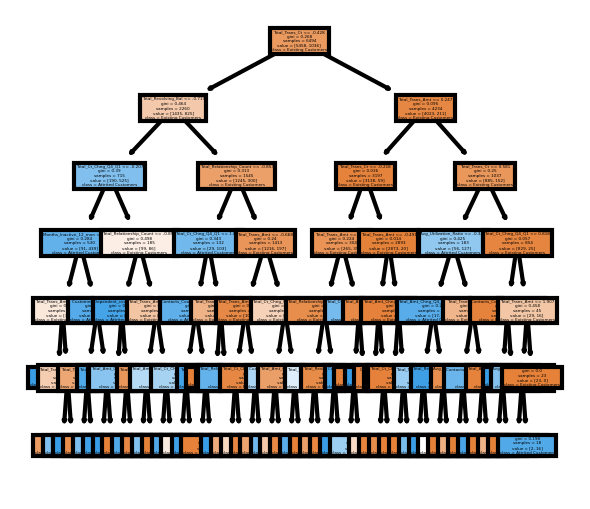

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (0.5,0.5), dpi= 300)
sklearn.tree.plot_tree(DT_best,
               feature_names = features, 
               class_names=['Existing Customers','Attrited Customers'],
               filled = True)
plt.show()
fig.savefig('Decision_tree_prepruning_best.png')

## note that we may use graphivz to save a better visualization to our machine.

## Random forest 

In [ ]:
# define the model: using loss criteria ginni
RF = RandomForestClassifier(n_estimators=59, criterion='gini', random_state=2022) ## gives best with randomstate as 2027
# fit on the training set
RF.fit(X_full_train,y_full_train)
# predict on test set
yhat_RF = RF.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_RF)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 96.51


In [ ]:
# define the model: using metric entropy
RF = RandomForestClassifier(n_estimators=1000, criterion='gini', random_state=2022, n_jobs = -1, bootstrap= False)  ## gives best with randomstate as 2027
# fit on the training set
RF.fit(X_full_train_tree,y_full_train_tree)
# predict on test set
yhat_RF = RF.predict(X_test_tree)
# evaluate predictions
accuracy = accuracy_score(y_test_tree, yhat_RF)
print('Test Accuracy: %.2f' % (accuracy*100))

## since the model performs beautifully on test data, no overfitting, we do not need to prune it further, but if we had to how would we?

Test Accuracy: 97.56


In [ ]:
print(RF.get_params())

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False, 'random_state': 2022, 'verbose': 0, 'warm_start': False}


### Random forest with pre-pruning

In [ ]:
# import GridSearchCV: to tune multiple parameters at a time


# define hyperparameters (dictionary) and all sort of values for each hyperparameter we are tuning
dict_hyperparam = {
                  'criterion': ['gini'], 
                  'n_estimators' : range(50,1000,50),
                  'max_depth': range(5,10),
                  'min_samples_split': range(1,10),
                  'min_samples_leaf': range(1,5)
                  }
# define the model
RF = RandomForestClassifier(random_state=2023)
RF_GS = GridSearchCV(RF, param_grid = dict_hyperparam, cv=10, verbose=1, n_jobs=-1) # n_jobs=-1 using all processors for parallel computation. 
RF_GS.fit(X_full_train,y_full_train)

## prinitning the best hyperparameters
print(RF_GS.best_params_)

Fitting 10 folds for each of 1900 candidates, totalling 19000 fits
{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 750}


In [ ]:
# RF_GS.best_params_: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 750}

In [ ]:
# define the best model
RF_best = RandomForestClassifier(n_estimators = RF_GS.best_params_['n_estimators'], criterion= RF_GS.best_params_['criterion'],
                            max_depth= RF_GS.best_params_['max_depth'],
                            min_samples_leaf = RF_GS.best_params_['min_samples_leaf'],
                            min_samples_split = RF_GS.best_params_['min_samples_split'],
                            random_state=2022)
# fit the model
RF_best.fit(X_full_train,y_full_train)
# predict on test set
yhat_RF = RF_best.predict(X_test)
# evaluate with test sample
accuracy = accuracy_score(y_test, yhat_RF)
print('Test Accuracy: %.2f' % (accuracy*100))

Test Accuracy: 96.25


# What features are most relavant to customer's decisions of leaving the credict card service?

In [ ]:
pd.DataFrame(RF.feature_importances_, index = features, columns =['feature importance']).sort_values('feature importance', ascending=False)

,feature importance
Total_Trans_Amt,0.188688
Total_Trans_Ct,0.173497
Total_Revolving_Bal,0.110003
Total_Ct_Chng_Q4_Q1,0.103011
Total_Relationship_Count,0.067547
Avg_Utilization_Ratio,0.066363
Total_Amt_Chng_Q4_Q1,0.064861
Customer_Age,0.034611
Credit_Limit,0.033500
Avg_Open_To_Buy,0.032132


# We choose the random forest model with non-normalised data since it performs beautifully and generlaises well on unseen data.
## End of notebook
